In [37]:
target_contracts = [c.lower().strip() for c in input("Target Contracts: ").split(",")]
consumer_contracts = [c.lower().strip() for c in input("Consumer Contracts: ").split(",")]

Target Contracts:  0x16b9a82891338f9bA80E2D6970FddA79D1eb0daE,0xa361433E409Adac1f87CDF133127585F8a93c67d
Consumer Contracts:  0x34Bd6Dba456Bc31c2b3393e499fa10bED32a9370


/usr/local/Cellar/jupyterlab/4.0.10/libexec/bin/python


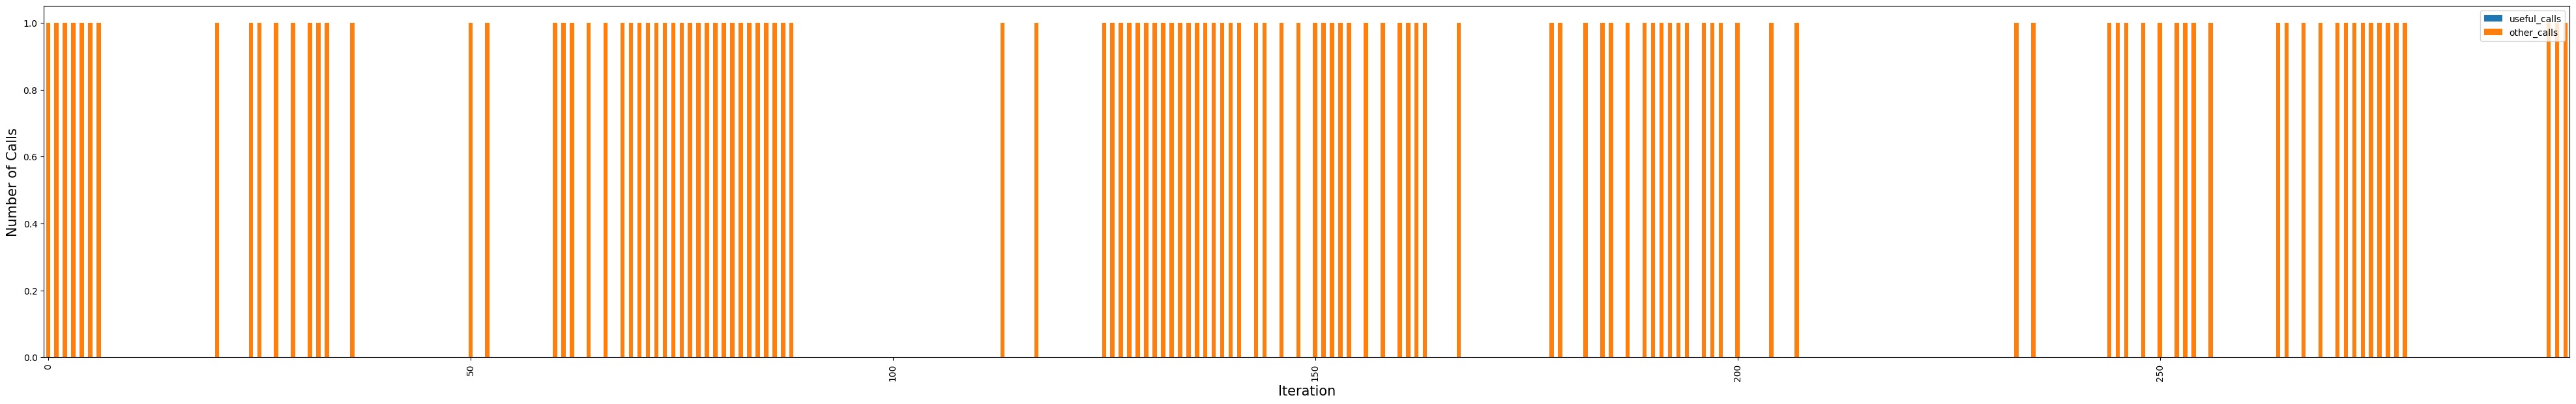

In [182]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

contract_data = {'useful_calls':[], 'other_calls':[]}
contract_secs = []


for i in range(1, 300):
    with open('./work_dir/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = 0
        useful_calls = 0
        index = 0
        while index < len(data) - 1:
            # layer = 0 includes FirstLevelCall and Logging Events: https://medium.com/mycrypto/understanding-event-logs-on-the-ethereum-blockchain-f4ae7ba50378
            # It is more accurate to count only FirstLevelCall as intentional input
            # This is still not optimal -- many mutations that don't add interesting states are not logged
            if data[index][1]['call_type'] != "FirstLevelCall":
                index += 1
                continue
            current_call = data[index][1]["contract"]
            total_calls += 1
            if current_call in target_contracts_set:
                target_contracts_set.remove(current_call)
            if len(target_contracts_set) == 0:
                useful_calls += 1
            index += 1
        contract_data['useful_calls'].append(useful_calls)
        contract_data['other_calls'].append(total_calls - useful_calls)

df = pd.DataFrame(data = contract_data)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
loc = plticker.MultipleLocator(base = 50) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Number of Calls", fontsize=15)
plt.show()

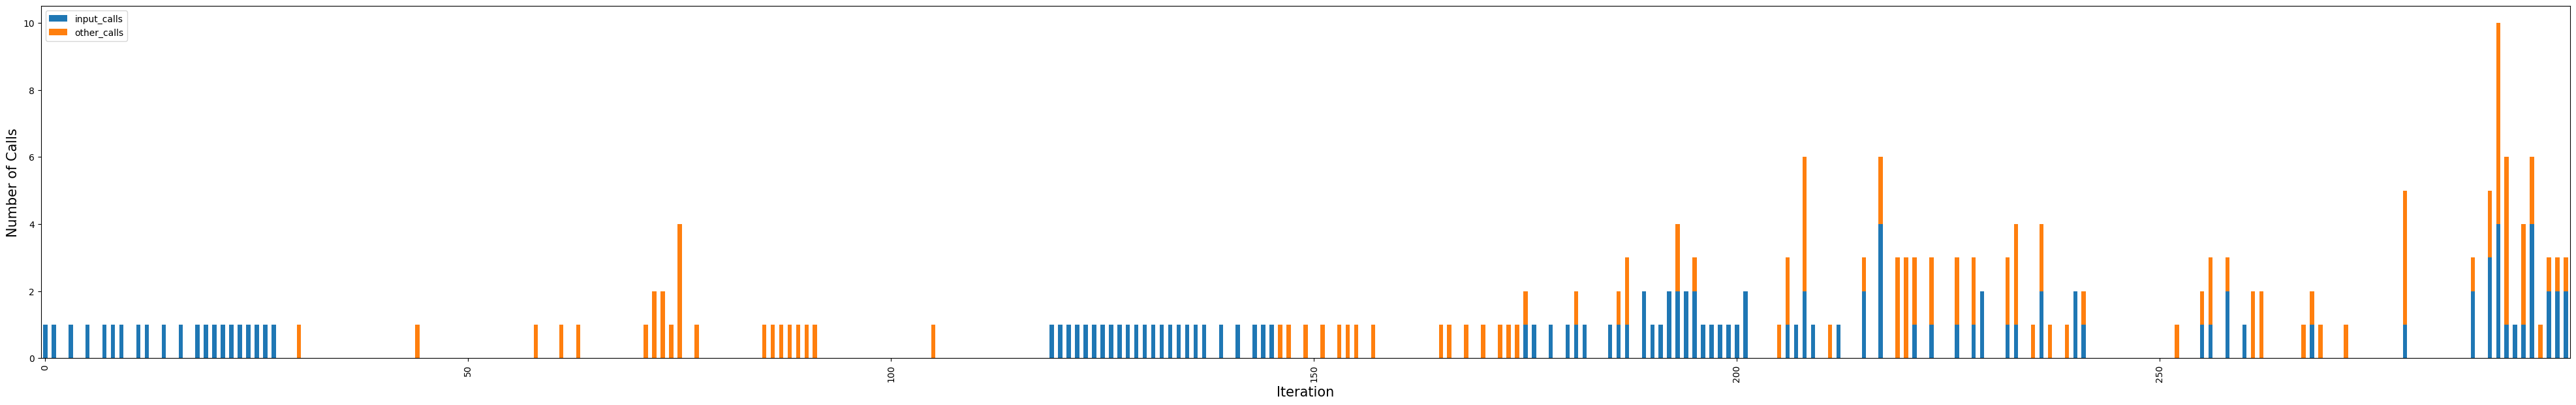

In [180]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

target_contracts_set = set(target_contracts)
consumer_contracts_set = set(consumer_contracts)
contract_data = {'input_calls':[], 'other_calls':[]}

for i in range(1, 300):
    with open('./edg_finance_results_time_stamped/traces/' + str(i) + '.json') as f:
        data = json.load(f)["data"]
        total_calls = 0
        input_calls = 0
        index = 0
        while index < len(data) - 1:
            if data[index][1]['call_type'] != "FirstLevelCall":
                index += 1
                continue
            current_call = data[index][1]["contract"]
            current_caller = data[index][1]["caller"]
            total_calls += 1
            if current_call in target_contracts_set or current_call in consumer_contracts_set:
                input_calls += 1
            index += 1
        contract_data['input_calls'].append(input_calls)
        contract_data['other_calls'].append(total_calls - input_calls)

df = pd.DataFrame(data = contract_data)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
loc = plticker.MultipleLocator(base = 50) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Number of Calls", fontsize=15)
plt.show()

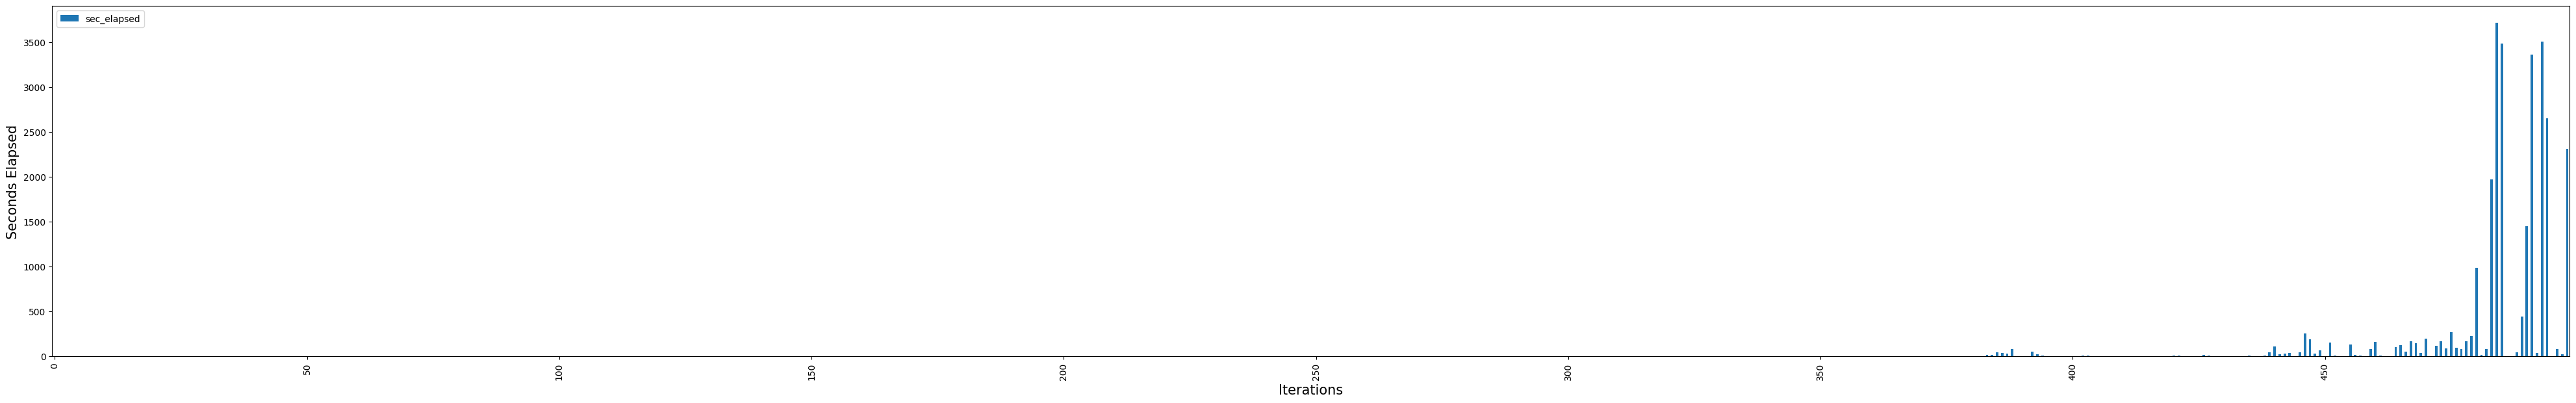

In [149]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

contract_data = {'sec_elapsed': []}
prev_sec_elapsed = 0

for i in range(1, 500):
    with open('./edg_finance_results_time_stamped/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = len(data)
        useful_calls = 0
        index = 0
        while index < total_calls - 1:
            sec_elapsed = data[index][1]["sec_elapsed"]
            if len(target_contracts_set) == 0:
                useful_calls = total_calls - index
                break
            index += 1
        contract_data['sec_elapsed'].append(sec_elapsed - prev_sec_elapsed)
        prev_sec_elapsed = sec_elapsed

df = pd.DataFrame(data = contract_data)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
loc = plticker.MultipleLocator(base = 50) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xlabel("Iterations", fontsize=15)
plt.ylabel("Seconds Elapsed", fontsize=15)
plt.show()

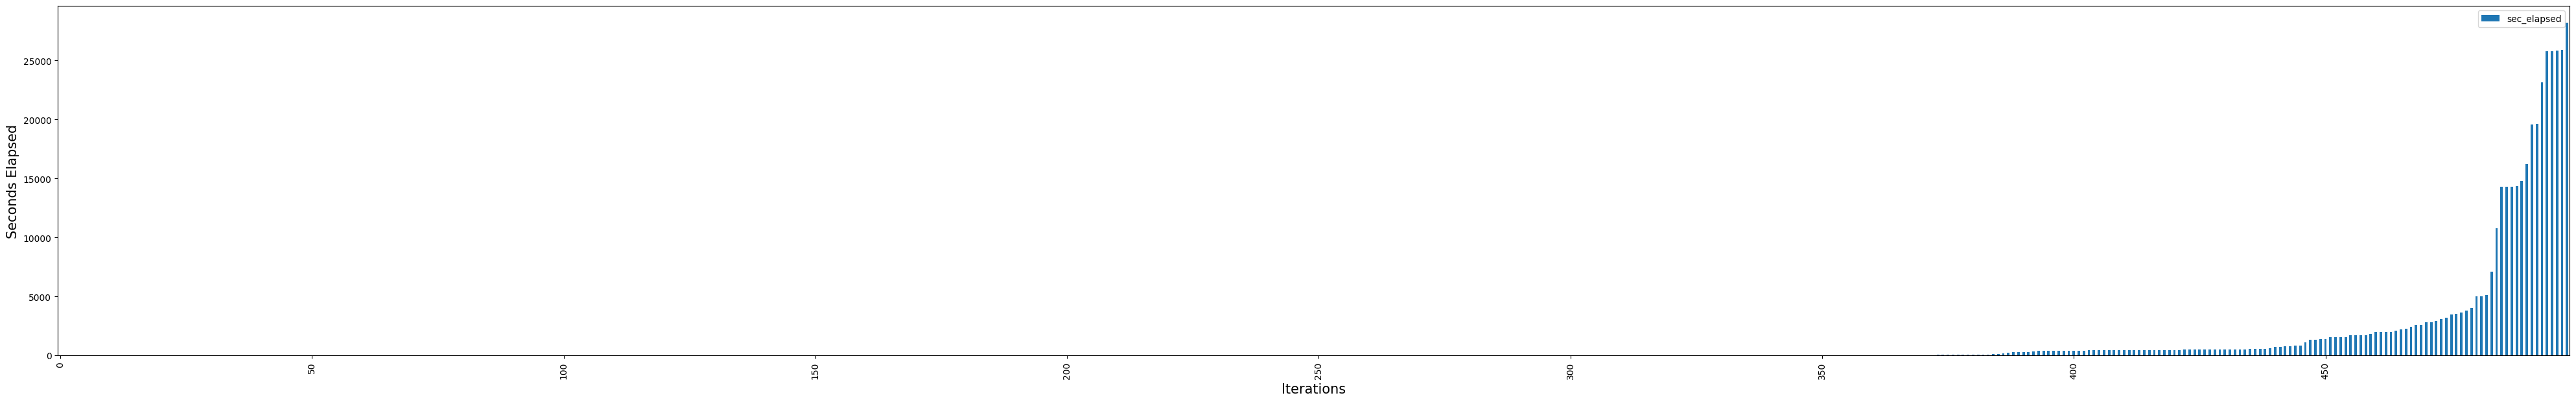

In [150]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

contract_data = {'sec_elapsed': []}

for i in range(1, 500):
    with open('./edg_finance_results_time_stamped/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = len(data)
        useful_calls = 0
        index = 0
        while index < total_calls - 1:
            sec_elapsed = data[index][1]["sec_elapsed"]
            if len(target_contracts_set) == 0:
                useful_calls = total_calls - index
                break
            index += 1
        contract_data['sec_elapsed'].append(sec_elapsed)

df = pd.DataFrame(data = contract_data)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
loc = plticker.MultipleLocator(base = 50) # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)
plt.xlabel("Iterations", fontsize=15)
plt.ylabel("Seconds Elapsed", fontsize=15)
plt.show()

             useful_calls  other_calls
sec_elapsed                           
0                      37          522
1                       0          316
2                      59           99
3                     131          682
4                       0          161
...                   ...          ...
25793                 475           15
25794                 547           15
25873                 514           15
25900                 514           15
28212                 530           15

[149 rows x 2 columns]


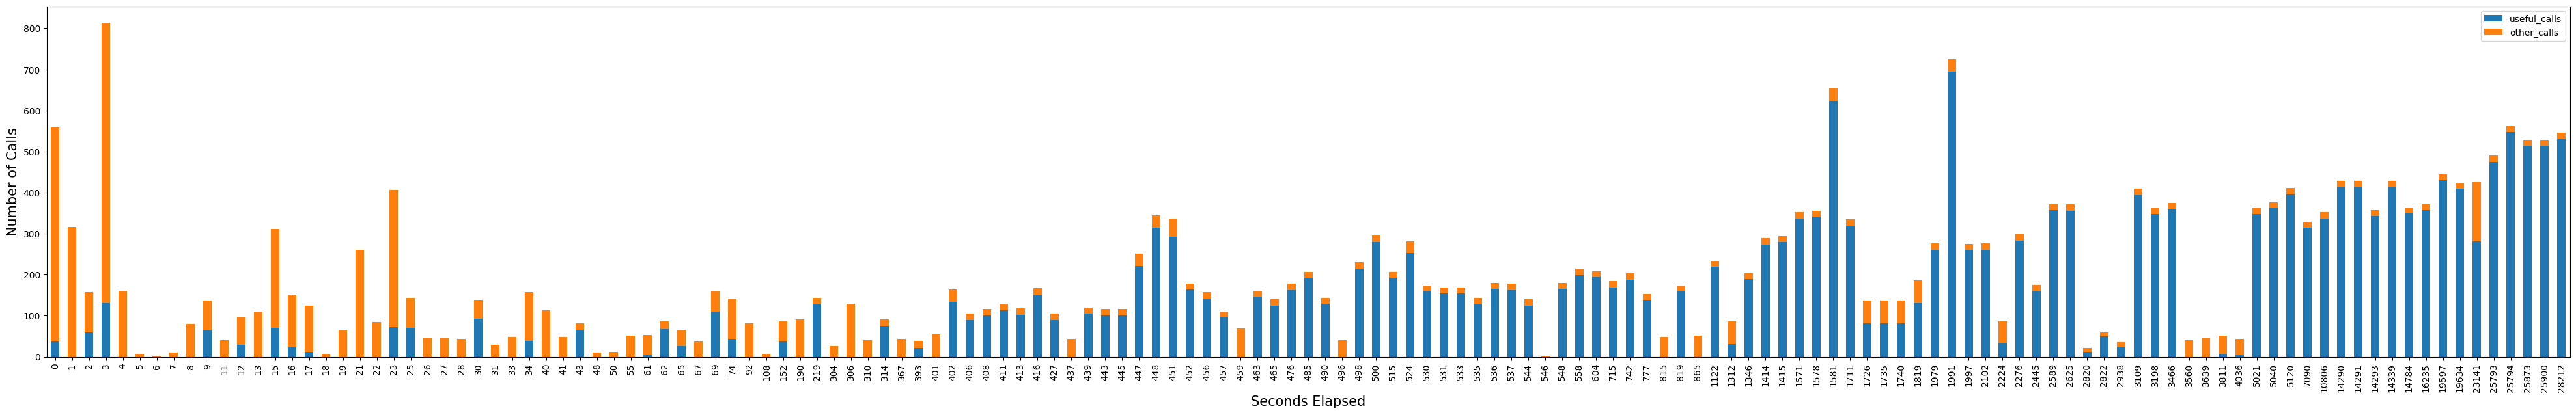

In [105]:
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import pandas as pd

contract_data = {'sec_elapsed': [], 'useful_calls':[], 'other_calls':[]}


for i in range(1, 500):
    with open('./edg_finance_results_time_stamped/traces/' + str(i) + '.json') as f:
        target_contracts_set = set(target_contracts)
        consumer_contracts_set = set(consumer_contracts)
        data = json.load(f)["data"]
        total_calls = len(data)
        useful_calls = 0
        sec_elapsed = 0
        index = 0
        while index < total_calls - 1:
            current_call = data[index][1]["contract"]
            sec_elapsed = data[index][1]["sec_elapsed"]
            #print(current_call)
            #print(target_contracts_set)
            if current_call in target_contracts_set:
                target_contracts_set.remove(current_call)
            if len(target_contracts_set) == 0:
                useful_calls = total_calls - index
                break
            index += 1
        contract_data['sec_elapsed'].append(sec_elapsed)
        contract_data['useful_calls'].append(useful_calls)
        contract_data['other_calls'].append(total_calls - useful_calls)

df = pd.DataFrame(data = contract_data)
df = df.groupby(['sec_elapsed']).sum()
print(df)
ax = df.plot.bar(stacked=True, figsize=(50, 7))
#loc = plticker.MultipleLocator(base = 10, offset = 0) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
plt.xlabel("Seconds Elapsed", fontsize=15)
plt.ylabel("Number of Calls", fontsize=15)
plt.show()

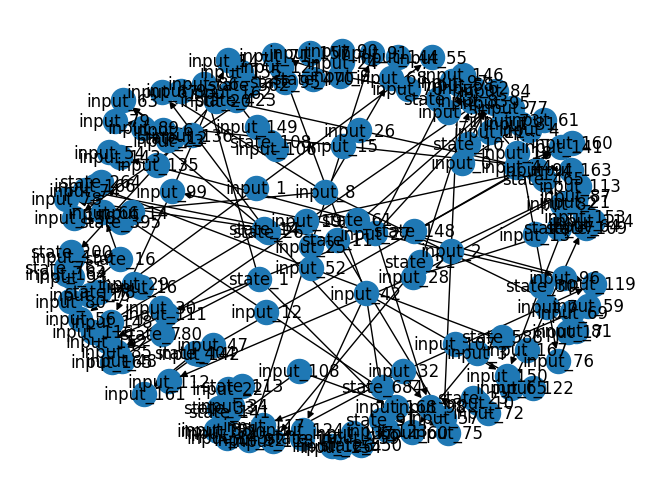

In [17]:
import json
import glob
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add nodes / edges of input type
for file_path in glob.glob("./work_dir/corpus/*_input_corpus_origin"):
    with open(file_path) as f:
        data = json.load(f)
        new_input_id = data['new_input_id']
        from_input_id = data['from_input_id']
        state_mutated = data["state_mutated"]
        from_state_id = data['from_state_id']
        
        G.add_edge("input_{}".format(from_input_id),
                   "input_{}".format(new_input_id))
        if from_state_id != 0:
            G.add_edge("state_{}".format(data['from_state_id']), 
                       "input_{}".format(data['new_input_id']))

# Add nodes / edges of state type
# for file_path in glob.glob("./work_dir/corpus/*_state_corpus_origin"):
#     with open(file_path) as f:
#         data = json.load(f)
#         G.add_edge("input_{}".format(data['from_corpus_id']), 
#                    "state_{}".format(data['new_corpus_id']), 
#                    state_mutated = data["state_mutated"])

nx.draw(G, with_labels=True)
plt.show()